In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Download JGB yield from MOF

In [16]:
path = r"https://www.mof.go.jp/english/jgbs/reference/interest_rate/historical/jgbcme_all.csv"
raw = pd.read_csv(path, header=1, index_col="Date")

In [723]:
df = raw[raw.index > "2016/9/22"]
# df = raw[raw.index > "2020/5/1"]

In [724]:
df = df.astype(np.float64)

### Leave only liquid terms

In [725]:
cols = ['2Y', '5Y', '7Y', '10Y', '15Y', '20Y', '25Y', '30Y', '40Y']
df = df[cols]

In [726]:
df.columns

Index(['2Y', '5Y', '7Y', '10Y', '15Y', '20Y', '25Y', '30Y', '40Y'], dtype='object')

In [727]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

### Use MLPRegressor as AutoEncoder
Set unit number in hidden layer relative to grid points

In [728]:
from sklearn.neural_network import MLPRegressor
n = int(scaled.shape[1] / 3)
n = 5
regr = MLPRegressor(hidden_layer_sizes=(n,),
                    activation="relu",
                    random_state=1, 
                    max_iter=500).fit(scaled, scaled)

In [729]:
autoencoder = lambda curve: scaler.inverse_transform(regr.predict(scaler.transform(curve)))

In [730]:
i = 0
(np.array(autoencoder(df.iloc[i,:].reshape(1, -1))) - np.array(df.iloc[i, :]))*100

/Users/yuseki/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


array([[-0.29299337, -0.50249159, -0.73489567, -1.52438451,  3.59425798,
        -2.72006538,  1.75258415,  5.4748039 ,  3.09549304]])

In [731]:
reproduction = autoencoder(df)
reproduction = pd.DataFrame(reproduction, index=df.index, columns=df.columns)

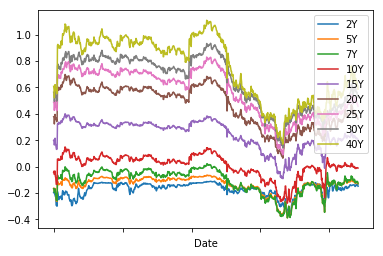

In [732]:
reproduction.plot()

In [733]:
tenor = "30Y"

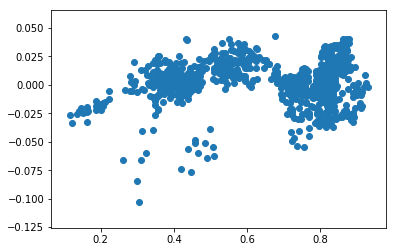

In [734]:
diff = df[tenor] - reproduction[tenor]
# plt.plot(diff.index, diff, label = tenor)
plt.scatter(df[tenor], diff)

### Download recent data from MOF

In [735]:
# current = pd.read_csv(r"https://www.mof.go.jp/english/jgbs/reference/interest_rate/jgbcme.csv", header=1, index_col="Date")
# current = np.array(current[cols])

In [736]:
reproduction_current = scaler.inverse_transform(regr.predict(scaler.transform(current)))

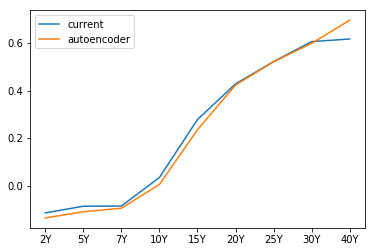

In [737]:
plt.plot(current[-1], label="current")
plt.plot(reproduction_current[-1], label="autoencoder")
plt.legend()
plt.xticks(range(len(df.columns)), df.columns)
plt.show()

In [738]:
rich_cheap = pd.DataFrame(current[-1] - reproduction_current[-1], index=df.columns)

In [739]:
rich_cheap*100

,0
2Y,2.113296
5Y,2.319064
7Y,0.915898
10Y,2.914152
15Y,4.269474
20Y,0.513372
25Y,0.105756
30Y,0.725529
40Y,-7.891246


In [740]:
diffs = df - reproduction

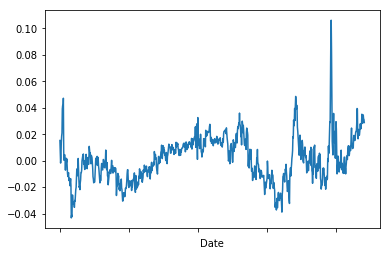

In [750]:
plot_tenor = "10Y"
diffs[plot_tenor].plot()